In [1]:
import dv_processing as dv
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple
from snn_delays.utils.test_behavior import tb_save_max_last_refact
from snn_delays.utils.visualization_utils import plot_conv_filters

device = get_device()
dataset = 'davis_loihi'
total_time = 100
batch_size = 64
folder_name = 'FromLoihi_ABCXO_15Hz_64_robust'

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  sensor_size_to = 64,
                  folder_name = folder_name)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cuda:0
[Downsample(time_factor=1, spatial_factor=1.0, sensor_size=None, target_size=None), ToFrame(sensor_size=(64, 64, 2), time_window=None, event_count=None, n_time_bins=100, n_event_bins=None, overlap=0, include_incomplete=False)]


In [2]:
dataset_dict['time_ms'] = 100
dataset_dict

{'num_input': 8192,
 'num_input_channels': 2,
 'num_training_samples': 7500,
 'num_output': 5,
 'dataset_name': 'davis_loihi',
 'time_ms': 100}

Delta t: 1.0 ms
SNN(
  (layers): ModuleList(
    (0): Conv2DSNNLayer(
      (conv): Conv2d(2, 8, kernel_size=(4, 4), stride=(4, 4), bias=False)
    )
    (1): FlattenSNNLayer()
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=96, bias=False)
    )
    (3): FeedforwardSNNLayer(
      (linear): Linear(in_features=96, out_features=5, bias=False)
    )
  )
  (criterion): MSELoss()
)


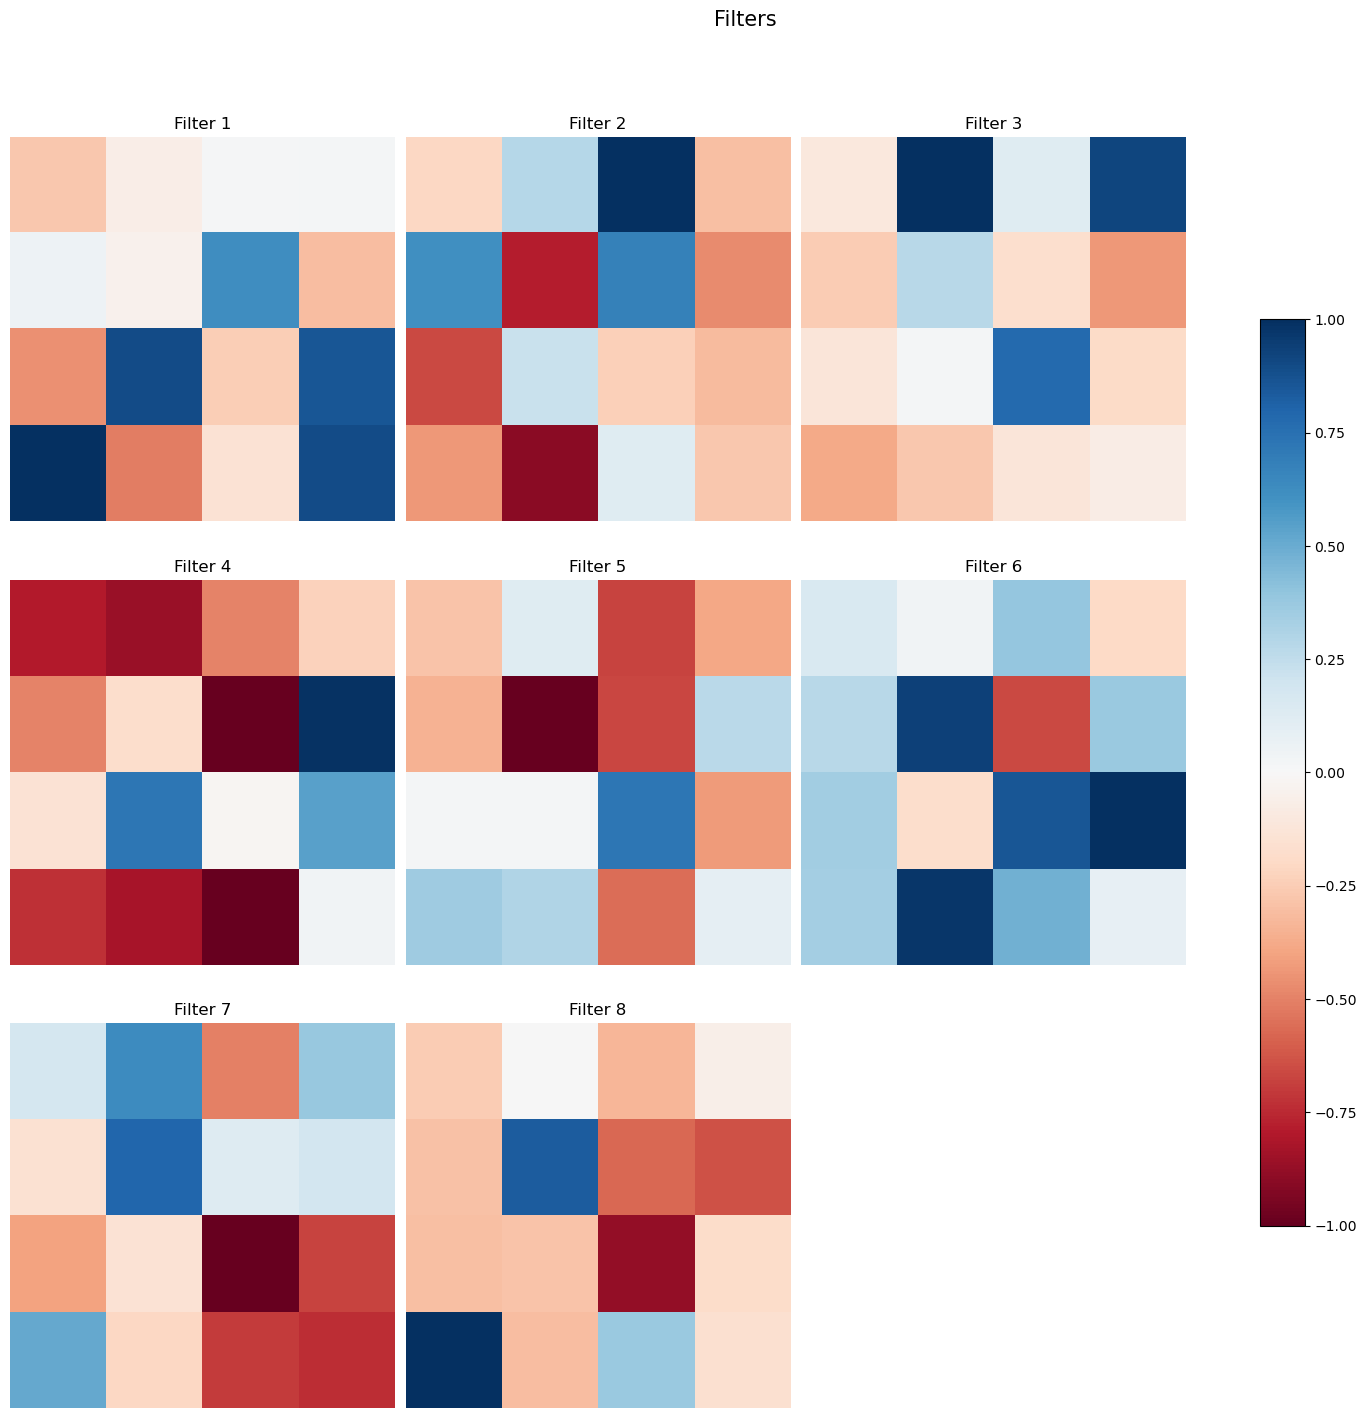

In [3]:
ckpt_dir = 'abcxo_64_Conv_15Hz'

# structure = (96, 2, 'f')

# extra_kwargs = {'conv':[(2, 16, 4), (16, 24, 4)]}

#extra_kwargs = {}

#tau_m = 50 # initial experiments
tau_m = 5.0 

model_config = [
    {
        'type': 'Conv2D', 
        'out_channels': 8, 
        'kernel_size': 4 
    }, 
    {
        'type': 'Flatten'
    }, 
    {
        'type': 'Feedforward', 
        'num_out': 96 # Number of neurons in this dense layer
    }
]


snn = SNN(dataset_dict=dataset_dict, model_config=model_config,
           tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
        )

snn.input2spike_th = 0.5

snn.model_name = 'abcxo_conv_64_15Hz_shallow_binary'
snn.set_layers()
snn.to(device)
print(snn)

plot_conv_filters(snn.layers[0])

Epoch [1/10], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [39/117], Loss: 0.15164
Step [78/117], Loss: 0.13979
Step [117/117], Loss: 0.11597
Time elasped: 104.68332505226135
1456
Test Loss: 0.11016604725433432
Avg spk_count per neuron for all 100 time-steps 3280.9136904761904
Test Accuracy of the model on the test samples: 72.047

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
saving max acc: 72.0467032967033
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
Epoch [2/10], learning_rates 0.001000, 0.100000
Step [39/117], Loss: 0.10016
Step [78/117], Loss: 0.08287
Step [117/117], Loss: 0.06620
Time elasped: 71.36728477478027
1456
Test Loss: 0.06650858955538791
Avg spk_count per neuron for all 100 time-steps 5454.190705128205
Test Accuracy of the model on the test samples: 91.346

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
saving max acc: 91.34615384615384


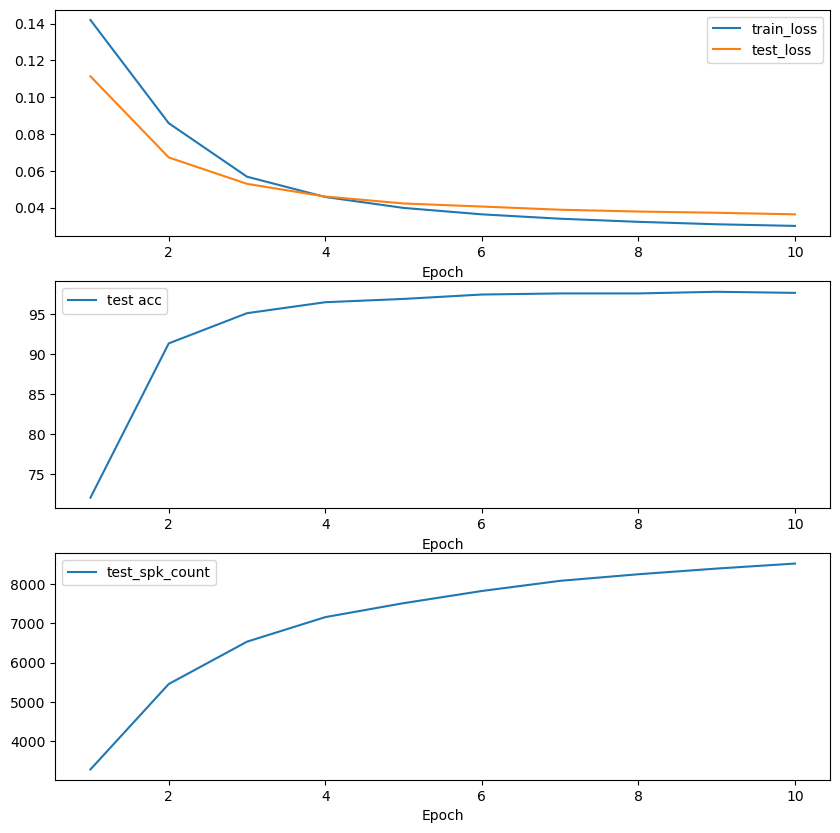

In [4]:
num_epochs = 10
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_last_refact, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

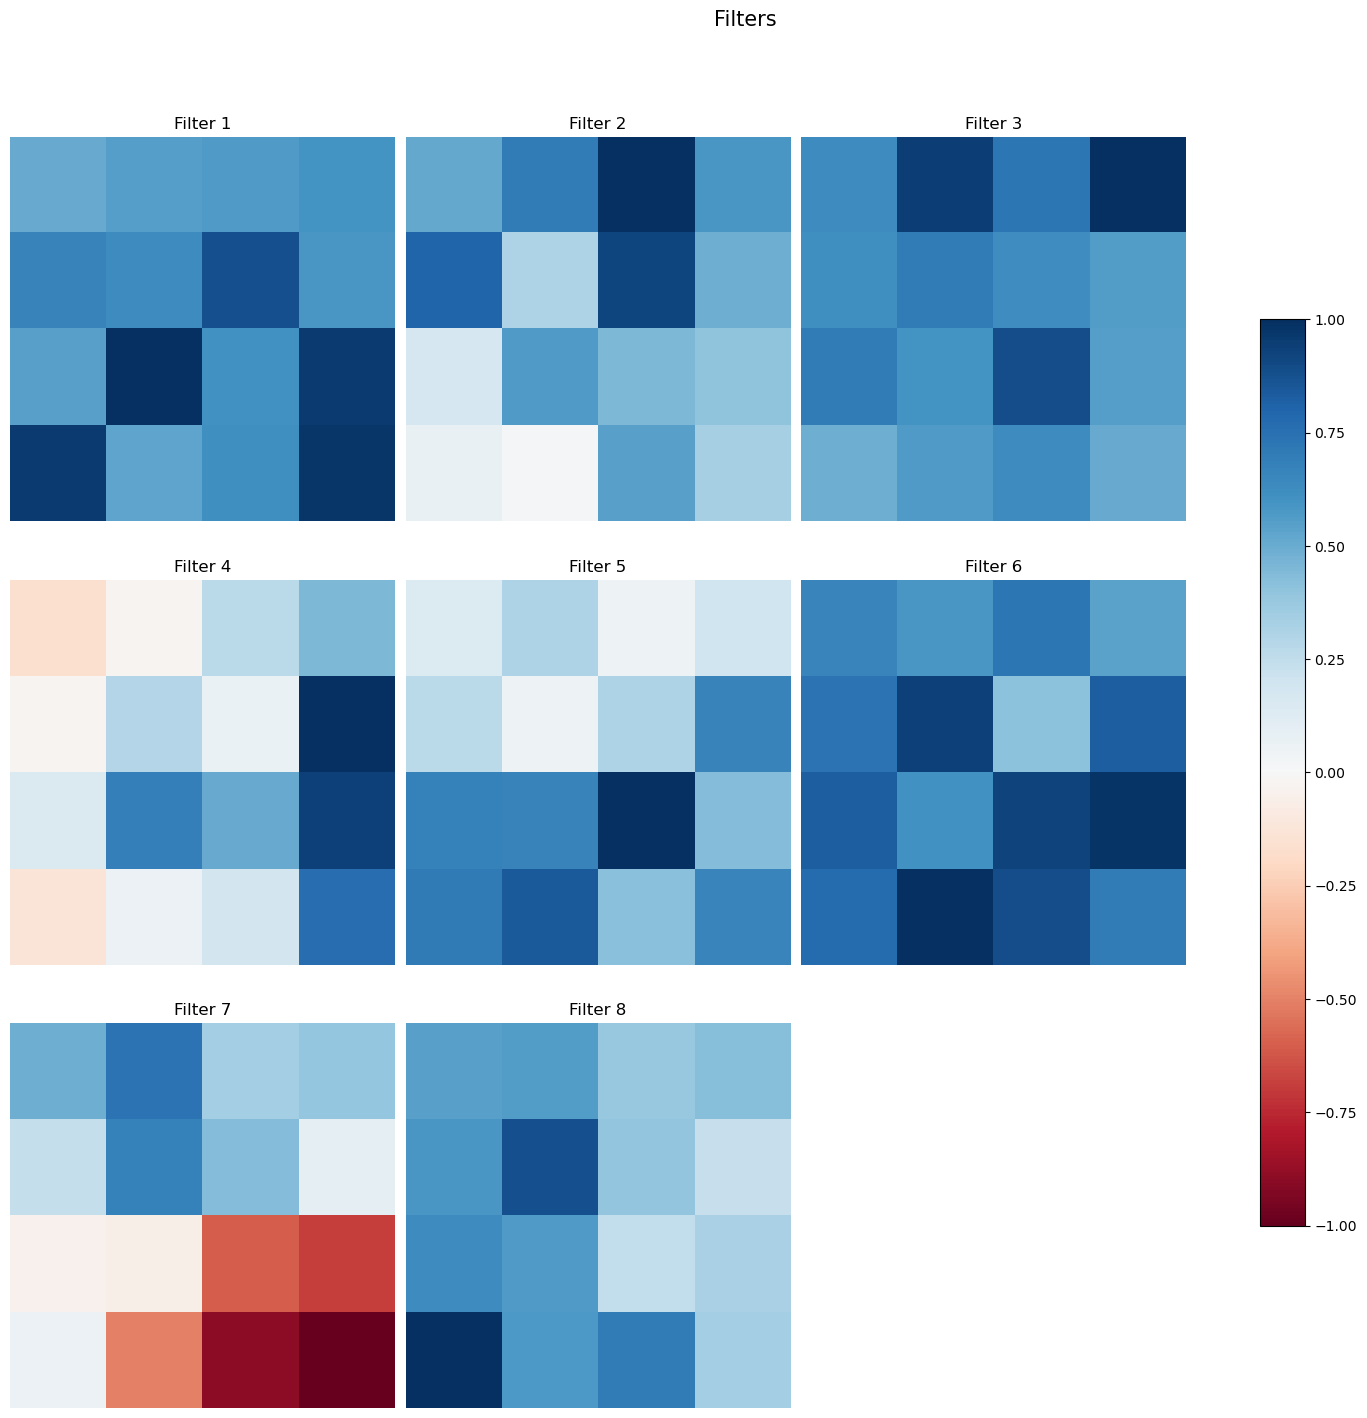

In [5]:
plot_conv_filters(snn.layers[0])

Without binarizing the inputs

Delta t: 1.0 ms
SNN(
  (layers): ModuleList(
    (0): Conv2DSNNLayer(
      (conv): Conv2d(2, 8, kernel_size=(4, 4), stride=(4, 4), bias=False)
    )
    (1): FlattenSNNLayer()
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=96, bias=False)
    )
    (3): FeedforwardSNNLayer(
      (linear): Linear(in_features=96, out_features=5, bias=False)
    )
  )
  (criterion): MSELoss()
)


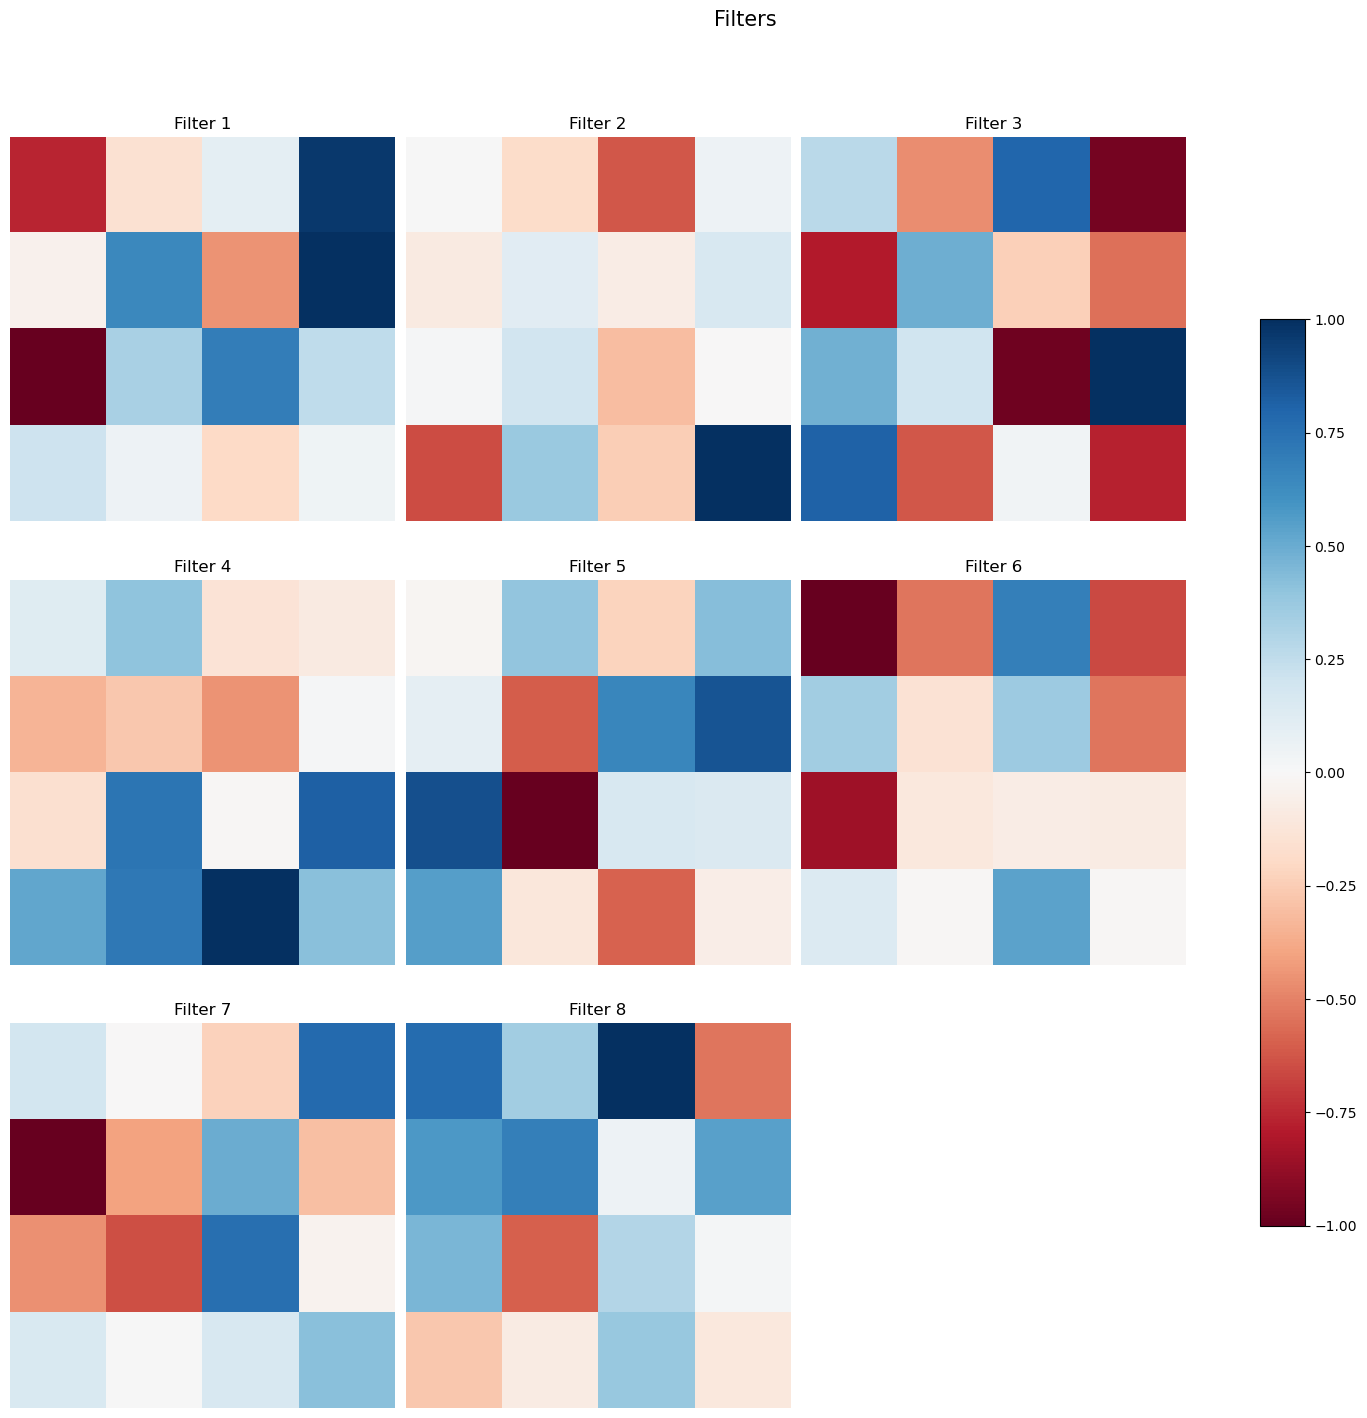

In [6]:

snn = SNN(dataset_dict=dataset_dict, model_config=model_config, tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device)
snn.model_name = 'abcxo_conv_64_15Hz_shallow'
snn.set_layers()
snn.to(device)
print(snn)

plot_conv_filters(snn.layers[0])

Epoch [1/10], learning_rates 0.001000, 0.100000
Step [39/117], Loss: 0.15228
Step [78/117], Loss: 0.11941
Step [117/117], Loss: 0.11120
Time elasped: 71.89290475845337
1456
Test Loss: 0.10447795591924501
Avg spk_count per neuron for all 100 time-steps 4385.247939560439
Test Accuracy of the model on the test samples: 74.107

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
saving max acc: 74.10714285714286
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
Epoch [2/10], learning_rates 0.001000, 0.100000
Step [39/117], Loss: 0.07748
Step [78/117], Loss: 0.07234
Step [117/117], Loss: 0.06226
Time elasped: 70.61184358596802
1456
Test Loss: 0.06248480680844058
Avg spk_count per neuron for all 100 time-steps 6907.071428571428
Test Accuracy of the model on the test samples: 93.475

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_

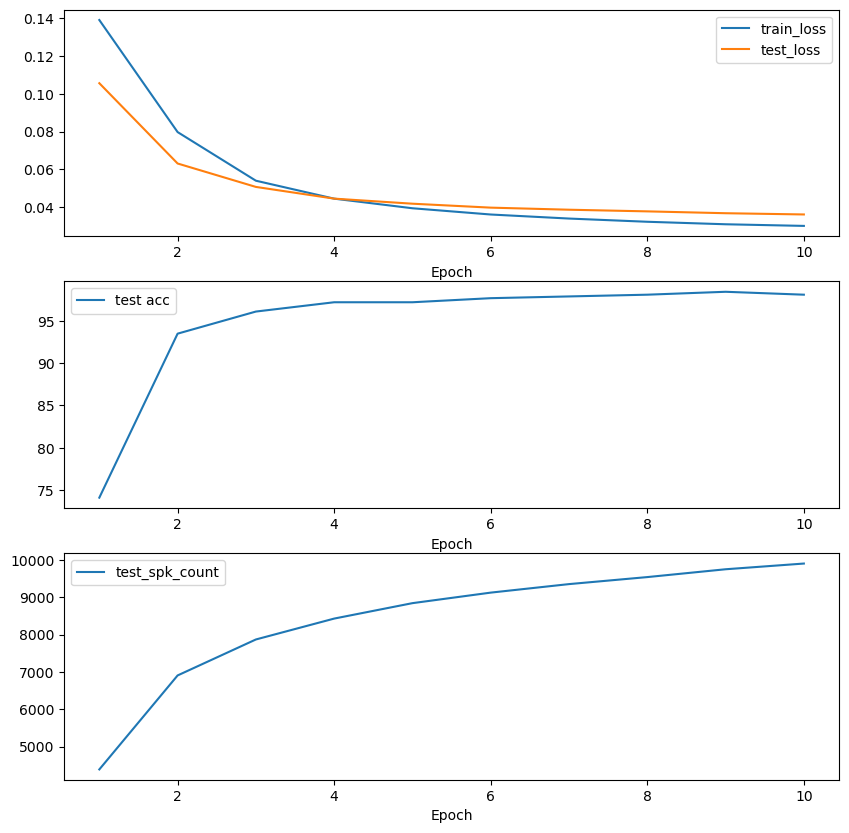

In [7]:
num_epochs = 10
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_last_refact, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

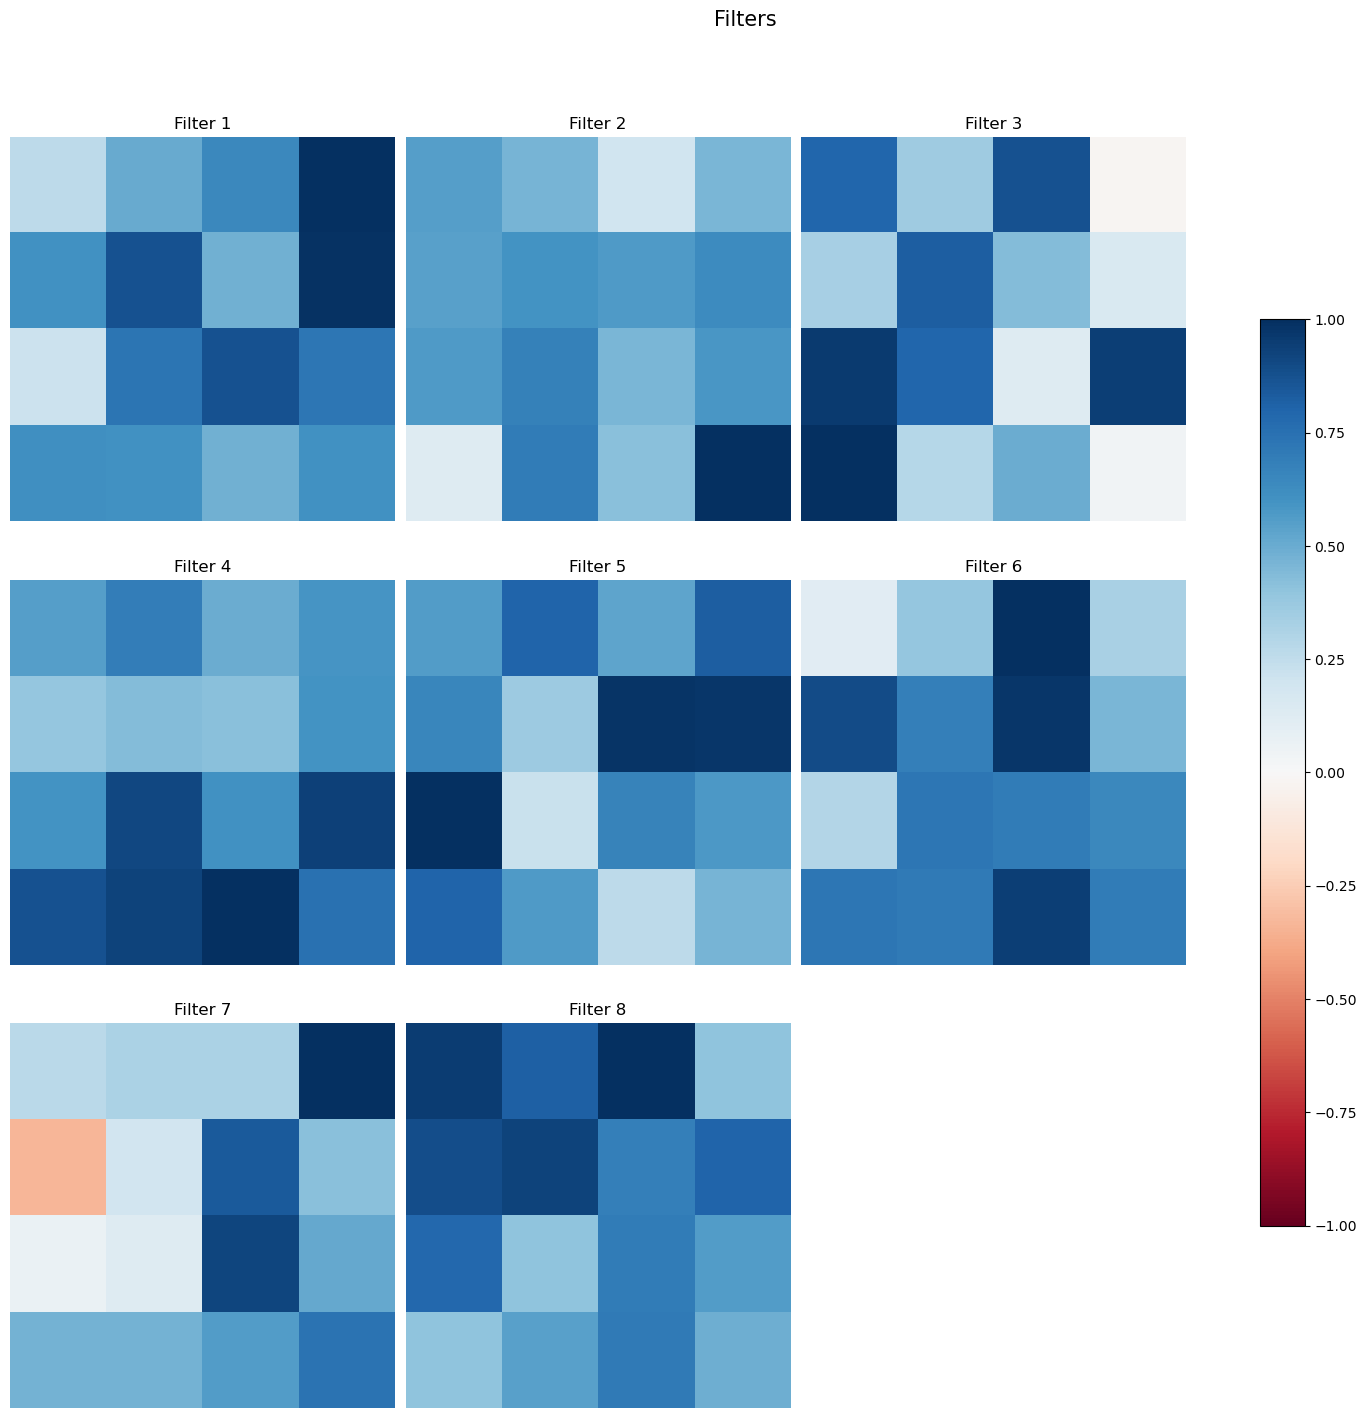

In [8]:
plot_conv_filters(snn.layers[0])